In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import variation, f_oneway, kruskal
from statistics import median
from matplotlib import rc

In [2]:
# Use the computer modern font for the plots
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'axes.grid' : False}
sns.set_theme(style="whitegrid", rc=custom_params, font_scale=1)

In [3]:
root_dir = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(root_dir, "data/processed/data_cleaned.csv"))

/tmp/ipykernel_80497/2404526448.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root_dir, "data/processed/data_cleaned.csv"))


In [4]:
df.head(10)

,subject,gender,age,hand,x_coordinate,y_coordinate,timestamp,state,date,azimuth,altitude,pressure,control,session
0,T001,NaN,NaN,R,1493,9752,2098403,1,1970-01-01 12:34:58.403000,1990,720,6,N,u00005s00001_hw00001.svc
1,T001,NaN,NaN,R,1490,9752,2098411,1,1970-01-01 12:34:58.411000,1990,720,168,N,u00005s00001_hw00001.svc
2,T001,NaN,NaN,R,1490,9752,2098418,1,1970-01-01 12:34:58.418000,1990,720,328,N,u00005s00001_hw00001.svc
3,T001,NaN,NaN,R,1490,9752,2098426,1,1970-01-01 12:34:58.426000,1990,720,480,N,u00005s00001_hw00001.svc
4,T001,NaN,NaN,R,1489,9752,2098433,1,1970-01-01 12:34:58.433000,1990,720,667,N,u00005s00001_hw00001.svc
5,T001,NaN,NaN,R,1489,9752,2098441,1,1970-01-01 12:34:58.441000,1990,720,791,N,u00005s00001_hw00001.svc
6,T001,NaN,NaN,R,1489,9752,2098448,1,1970-01-01 12:34:58.448000,2020,720,889,N,u00005s00001_hw00001.svc
7,T001,NaN,NaN,R,1489,9752,2098456,1,1970-01-01 12:34:58.456000,2020,720,967,N,u00005s00001_hw00001.svc
8,T001,NaN,NaN,R,1489,9752,2098463,1,1970-01-01 12:34:58.463000,2020,720,1031,N,u00005s00001_hw00001.svc
9,T001,NaN,NaN,R,1488,9752,2098471,1,1970-01-01 12:34:58.471000,2020,720,1065,N,u00005s00001_hw00001.svc


In [5]:
df.describe()

,age,x_coordinate,y_coordinate,timestamp,state,azimuth,altitude,pressure
count,51060.000000,250802.000000,250802.000000,2.508020e+05,250802.000000,250802.000000,250802.000000,250802.000000
mean,42.698394,3836.949331,6376.095613,1.222163e+11,0.806258,1218.043197,673.766995,958.260943
std,13.403745,1890.954648,2679.231170,3.871606e+11,0.395230,1000.303596,134.801812,620.309786
min,22.000000,59.000000,1399.000000,1.264550e+05,0.000000,0.000000,220.000000,0.000000
25%,32.000000,1770.000000,3820.000000,1.777883e+06,1.000000,340.000000,570.000000,488.000000
50%,48.000000,4592.000000,6797.000000,2.633750e+06,1.000000,940.000000,690.000000,1067.000000
75%,52.000000,5411.000000,8593.000000,5.482293e+06,1.000000,1900.000000,770.000000,1369.000000
max,62.000000,7198.000000,12317.000000,1.363796e+12,1.000000,3590.000000,900.000000,2048.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250802 entries, 0 to 250801
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   subject       250802 non-null  object 
 1   gender        51060 non-null   object 
 2   age           51060 non-null   float64
 3   hand          250802 non-null  object 
 4   x_coordinate  250802 non-null  int64  
 5   y_coordinate  250802 non-null  int64  
 6   timestamp     250802 non-null  int64  
 7   state         250802 non-null  int64  
 8   date          250802 non-null  object 
 9   azimuth       250802 non-null  int64  
 10  altitude      250802 non-null  int64  
 11  pressure      250802 non-null  int64  
 12  control       250802 non-null  object 
 13  session       250802 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 26.8+ MB


In [7]:
unique_subjects = df['subject'].drop_duplicates()

# Total number of unique subjects
num_subjects = unique_subjects.nunique()

# Number of healthy subjects (control == 'Y')
healthy_subjects = df[df['control'] == 'Y']['subject'].drop_duplicates().nunique()

# Number of sick subjects (control == 'N')
sick_subjects = df[df['control'] == 'N']['subject'].drop_duplicates().nunique()

print(f"Total number of unique subjects: {num_subjects}")
print(f"Number of healthy subjects: {healthy_subjects}")
print(f"Number of PD subjects: {sick_subjects}")

Total number of unique subjects: 32
Number of healthy subjects: 10
Number of PD subjects: 22


In [8]:
control_subjects = df[(df.control == 'Y')]['subject'].unique()
noncontrol_subjects = df[(df.control == 'N')]['subject'].unique()
control_sessions = []
noncontrol_sessions = []
for c in control_subjects:
    sessions = len(df[(df.control == 'Y') & (df.subject == c)]['session'].unique())
    control_sessions.append(sessions)
for c in noncontrol_subjects:
    sessions = len(df[(df.control == 'N') & (df.subject == c)]['session'].unique())
    noncontrol_sessions.append(sessions)
print(f"There are {median(control_sessions)} median sessions for control and {median(noncontrol_sessions)} median sessions for non-control in this dataset")

There are 2.0 median sessions for control and 5.0 median sessions for non-control in this dataset


In [9]:
for feature in df.select_dtypes(include=[np.number, object]).columns:
    # Check for missing, zero, or empty values
    missing_count = len(df[df[feature].isin(["", "0", 0, pd.NA, " ", np.nan])])
    print(f"{feature.capitalize()} has {missing_count} missing or zero values")

Subject has 0 missing or zero values
Gender has 199742 missing or zero values
Age has 199742 missing or zero values
Hand has 0 missing or zero values
X_coordinate has 0 missing or zero values
Y_coordinate has 0 missing or zero values
Timestamp has 0 missing or zero values
State has 48591 missing or zero values
Date has 0 missing or zero values
Azimuth has 27385 missing or zero values
Altitude has 0 missing or zero values
Pressure has 48591 missing or zero values
Control has 0 missing or zero values
Session has 0 missing or zero values


In [10]:
df["x_coordinate"].isna().sum(), df["y_coordinate"].isna().sum()

(0, 0)

In [11]:
len(df[(df["altitude"] == 0) & (df["azimuth"] == 0) & (df["pressure"] == 0)])

0

In [12]:
len(df[(df["state"] == 0) & (df["pressure"] != 0)])

0

In [13]:
missing_no = df.isnull().sum()
missing_no = missing_no[missing_no > 0]
print(f"There are {len(missing_no)} variables which contain an X number of missing (NaN or Null) values: \n{missing_no.to_string()}")

There are 2 variables which contain an X number of missing (NaN or Null) values: 
gender    199742
age       199742


In [14]:
for var, num in missing_no.items():
    total_no = len(df[f"{var}"])
    percent = (num / total_no) * 100
    print(f"{var}\t{round(percent,2)}%".expandtabs(15))

gender         79.64%
age            79.64%


In [15]:
filtered_data = df[(df['x_coordinate'] == 0) & (df['y_coordinate'] == 0)]
grouped_data = filtered_data.groupby(['subject', 'session']).size()
print(f"There are {len(grouped_data)} sessions that have spirals positioned at (0,0)")

There are 0 sessions that have spirals positioned at (0,0)


In [16]:
# Parse the x and y coordinates, date and timestamp to the correct formats
df['x_coordinate'] = pd.to_numeric(df['x_coordinate'], errors='coerce')
df['y_coordinate'] = pd.to_numeric(df['y_coordinate'], errors='coerce')
df["date"] = pd.to_datetime(df["date"])
df["timestamp"] = df["date"].dt.time.astype(str)

In [17]:
def create_metrics(df):
    df_temp = df.copy()
    grouping_vars = ['subject','session']
    df_temp["dx"] = df_temp.groupby(grouping_vars)["x_coordinate"].diff()
    df_temp["dy"] = df_temp.groupby(grouping_vars)["y_coordinate"].diff()
    df_temp["delta_altitude"] = df_temp.groupby(grouping_vars)["altitude"].diff().abs()
    df_temp["delta_pressure"] = df_temp.groupby(grouping_vars)["pressure"].diff().abs()
    df_temp["delta_azimuth"] = df_temp.groupby(grouping_vars)["azimuth"].diff().abs()
    # Calculate the delta distance as the Euclidean distance for each group
    df_temp["distance"] = np.sqrt(df_temp["dx"] ** 2 + df_temp["dy"] ** 2)
    # Compute time difference in seconds
    df_temp["dt"] = pd.to_datetime(df_temp["date"]).diff().dt.total_seconds()
    # Calculate speed
    df_temp["speed"] = df_temp["distance"] / df_temp["dt"]
    return df_temp
df = create_metrics(df)
print(df.shape)
df.head()

(250802, 22)


,subject,gender,age,hand,x_coordinate,y_coordinate,timestamp,state,date,azimuth,...,control,session,dx,dy,delta_altitude,delta_pressure,delta_azimuth,distance,dt,speed
0,T001,NaN,NaN,R,1493,9752,12:34:58.403000,1,1970-01-01 12:34:58.403,1990,...,N,u00005s00001_hw00001.svc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T001,NaN,NaN,R,1490,9752,12:34:58.411000,1,1970-01-01 12:34:58.411,1990,...,N,u00005s00001_hw00001.svc,-3.0,0.0,0.0,162.0,0.0,3.0,0.008,375.000000
2,T001,NaN,NaN,R,1490,9752,12:34:58.418000,1,1970-01-01 12:34:58.418,1990,...,N,u00005s00001_hw00001.svc,0.0,0.0,0.0,160.0,0.0,0.0,0.007,0.000000
3,T001,NaN,NaN,R,1490,9752,12:34:58.426000,1,1970-01-01 12:34:58.426,1990,...,N,u00005s00001_hw00001.svc,0.0,0.0,0.0,152.0,0.0,0.0,0.008,0.000000
4,T001,NaN,NaN,R,1489,9752,12:34:58.433000,1,1970-01-01 12:34:58.433,1990,...,N,u00005s00001_hw00001.svc,-1.0,0.0,0.0,187.0,0.0,1.0,0.007,142.857143


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250802 entries, 0 to 250801
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   subject         250802 non-null  object        
 1   gender          51060 non-null   object        
 2   age             51060 non-null   float64       
 3   hand            250802 non-null  object        
 4   x_coordinate    250802 non-null  int64         
 5   y_coordinate    250802 non-null  int64         
 6   timestamp       250802 non-null  object        
 7   state           250802 non-null  int64         
 8   date            250802 non-null  datetime64[ns]
 9   azimuth         250802 non-null  int64         
 10  altitude        250802 non-null  int64         
 11  pressure        250802 non-null  int64         
 12  control         250802 non-null  object        
 13  session         250802 non-null  object        
 14  dx              250678 non-null  flo

In [19]:
def aggregate_features(df_input):
    variability_data = []
    # Iterate over subjects
    for subject in df_input.subject.unique():
        subject_df = df_input[df_input.subject == subject]
        # Iterate over sessions for each subject
        for session in subject_df.session.unique():
            session_df = subject_df[
                (subject_df.session == session) & (subject_df.subject == subject)
            ]
            # Calculate variability (coefficient of variation) for speed
            speed_variability = variation(session_df["speed"].dropna())
            
            # Collect the information (session, subject, and speed variability)
            variability_data.append({
                "subject": subject,
                "session": session,
                "control": session_df["control"].iloc[0],
                "speed_variability": speed_variability
            })

    # Convert the variability data into a DataFrame
    variability_df = pd.DataFrame(variability_data)

    # Group by subject, session, and control, and calculate mean values for other features
    mean_df = df_input.groupby(["subject","session","control"]).agg({
        "altitude":'mean',
        "pressure":'mean',
        "azimuth":'mean',        
        "delta_altitude":'mean',
        "delta_pressure":'mean',
        "delta_azimuth":'mean',
        # "distance":'mean',
        # "speed":'mean',
    }).reset_index()

    # Merge the variability_df with mean_df on subject and session
    merged_df = pd.merge(mean_df, variability_df, on=["subject","session","control"], how="left")
    return merged_df
df_metrics = aggregate_features(df)
numerical_features = df_metrics.select_dtypes(include=[np.number]).columns
# Convert the class to numeric (0 for non-control/patients with PD, 1 for control/healthy patient)
df_metrics["control_numeric"] = (df_metrics["control"] == "Y").astype(int)
df_metrics.head()

,subject,session,control,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,speed_variability,control_numeric
0,C01,u00003s00002_hw000011.svc,Y,744.736842,1641.735324,3372.130567,0.779747,84.056203,7.103797,0.353673,1
1,C01,u00003s00002_hw000012.svc,Y,817.502444,1003.782991,1941.793744,0.767726,70.984841,7.413203,0.328152,1
2,C02,u00004s00001_hw000011.svc,Y,748.940962,1014.970785,3194.357882,0.883069,29.577345,18.666261,0.307090,1
3,C02,u00004s00001_hw000012.svc,Y,799.971469,936.285307,1673.128864,1.046622,45.383444,6.308278,0.384199,1
4,C03,u00005s00001_hw000011.svc,Y,759.467397,1108.660030,694.639124,0.806773,35.937251,14.203187,0.283591,1


In [20]:
unique_subjects = df_metrics['subject'].drop_duplicates()

# Total number of unique subjects
num_subjects = unique_subjects.nunique()

# Number of healthy subjects (control == 'Y')
healthy_subjects = df_metrics[df_metrics['control'] == 'Y']['subject'].drop_duplicates().nunique()

# Number of sick subjects (control == 'N')
sick_subjects = df_metrics[df_metrics['control'] == 'N']['subject'].drop_duplicates().nunique()

print(f"Total number of unique subjects: {num_subjects}")
print(f"Number of healthy subjects: {healthy_subjects}")
print(f"Number of PD subjects: {sick_subjects}")

Total number of unique subjects: 32
Number of healthy subjects: 10
Number of PD subjects: 22


In [21]:
# Number of sessions for healthy subjects (control == 'Y')
no_healthy_sessions = len(df_metrics[df_metrics['control_numeric'] == 1])

# Number of sessions for sick subjects (control == 'N')
no_sick_sessions = len(df_metrics[df_metrics['control_numeric'] == 0])

# Print the results
print(f"Number of sessions for the controlled group: {no_healthy_sessions}")
print(f"Number of sessions for the non-controlled group: {no_sick_sessions}")

Number of sessions for the controlled group: 20
Number of sessions for the non-controlled group: 104


In [22]:
# All sessions
all_sessions = len(df_metrics[df_metrics['control_numeric'] == 1]) + len(df_metrics[df_metrics['control_numeric'] == 0])
print(f"Number of sessions for the controlled and non-controlled groups: {all_sessions}")

Number of sessions for the controlled and non-controlled groups: 124


In [23]:
# Split the dataset into all controlled and non control patients
controlled = df.loc[df['control'] == 'Y']
noncontrolled = df.loc[df['control'] == 'N']
control_df= df[(df.subject == "C01") & (df.session == "u00003s00002_hw000011.svc")].reset_index(drop=True)
non_control_df = df[(df.subject == "T001") & (df.session == "u00005s00001_hw00001.svc")].reset_index(drop=True)

In [24]:
def plot_drawing(df):
    """
    Plots a spiral drawing for a single session
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.scatter(df['x_coordinate'], df['y_coordinate'], s=2)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    # plt.title('Handwritten Spirals')
    plt.show()

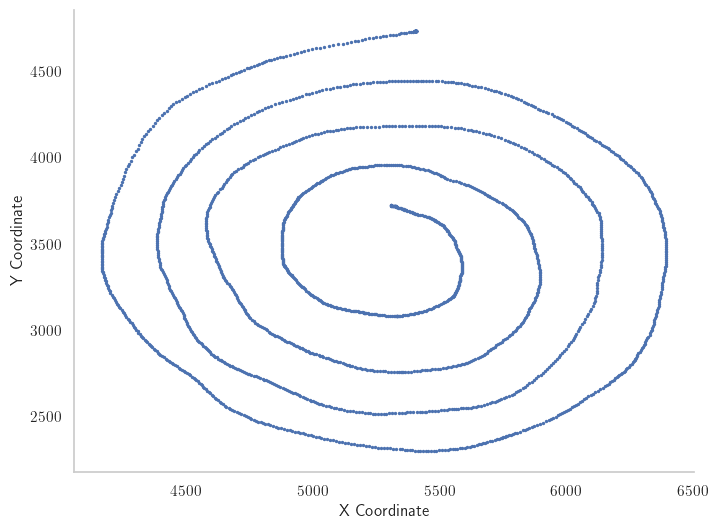

In [25]:
# Plot a sample drawing for a control patient
plot_drawing(control_df)

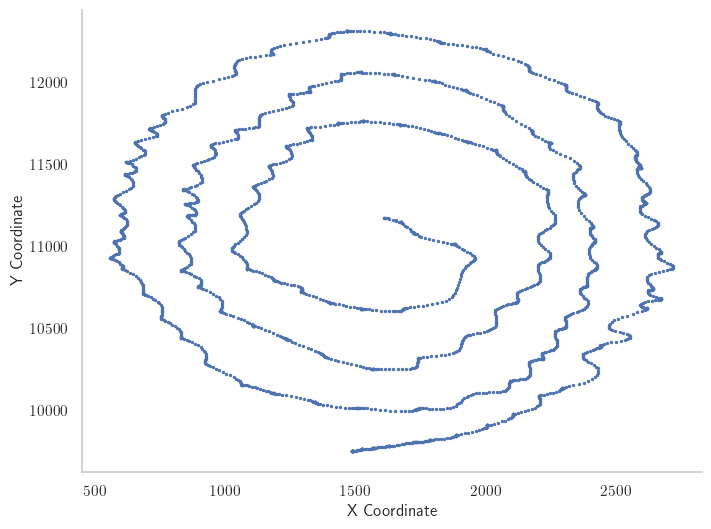

In [26]:
plot_drawing(non_control_df)

# Delta features

In [27]:
control_group = df_metrics[df_metrics['control'] == 'Y']
uncontrolled_group = df_metrics[df_metrics['control'] == 'N']
control_group.shape, uncontrolled_group.shape

((20, 11), (104, 11))

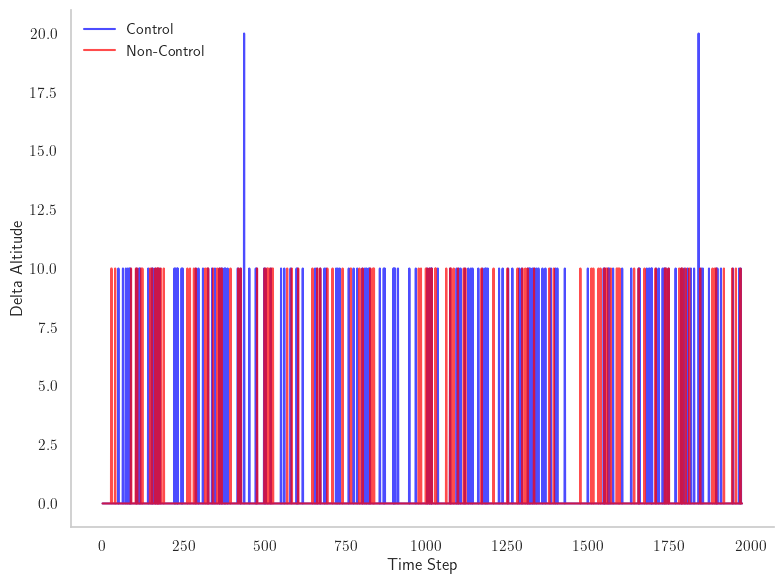

In [28]:
def make_delta_plot(control_df, non_control_df, plot_feature="altitude"):
    """
    Make the delta feature plot using either delta altitude, pressure or azimuth
    """
    if plot_feature == "altitude":
        feature = "delta_altitude"
        name = "Delta Altitude"
    elif plot_feature == "pressure":
        feature = "delta_pressure"
        name = "Delta Pressure"
    elif plot_feature == "azimuth":
        feature = "delta_azimuth"
        name = "Delta Azimuth"
    else:
        raise TypeError("Delta feature not recognized")

    # Find the minimum length between the two dataframes
    min_length = min(len(control_df[feature]), len(non_control_df[feature]))
    # Trim both dataframes to the minimum length
    control_delta = control_df[feature][:min_length]
    non_control_delta = non_control_df[feature][:min_length]
    time_step = np.arange(min_length)

    # Merge data from the control and non control dataframes
    combined_df = pd.DataFrame({
        "time_step": np.concatenate([time_step, time_step]),
        feature: np.concatenate([control_delta, non_control_delta]),
        "group": ["Control"] * min_length + ["Non-Control"] * min_length  # String labels
    })
    
    palette = {"Control": "blue", "Non-Control": "red"}
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(
        data=combined_df, 
        x="time_step", 
        y=feature, 
        hue="group", 
        palette=palette,
        alpha=0.7
    )
    plt.xlabel('Time Step')
    plt.ylabel(name)
    # plt.title(f'{name} over Time by Session')
    plt.legend(frameon=False, loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(root_dir,f"graphs/{feature}.pdf"), bbox_inches="tight")
    plt.show()

make_delta_plot(control_df, non_control_df, "altitude")

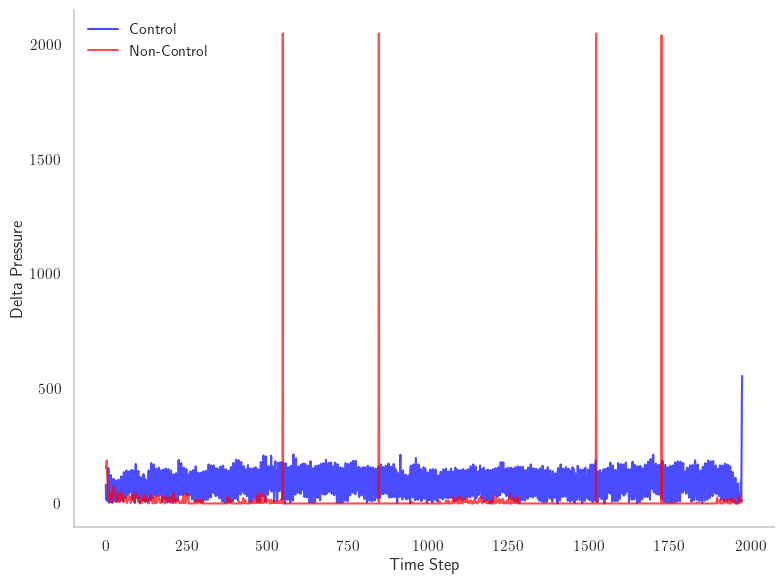

In [29]:
make_delta_plot(control_df, non_control_df, "pressure")

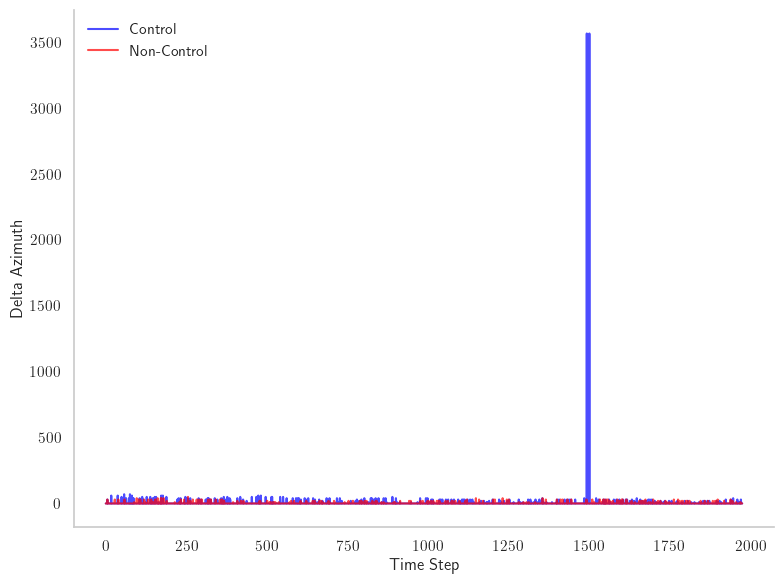

In [30]:
make_delta_plot(control_df, non_control_df, "azimuth")

# Drawing Speed

In [31]:
df_metrics.head()

,subject,session,control,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,speed_variability,control_numeric
0,C01,u00003s00002_hw000011.svc,Y,744.736842,1641.735324,3372.130567,0.779747,84.056203,7.103797,0.353673,1
1,C01,u00003s00002_hw000012.svc,Y,817.502444,1003.782991,1941.793744,0.767726,70.984841,7.413203,0.328152,1
2,C02,u00004s00001_hw000011.svc,Y,748.940962,1014.970785,3194.357882,0.883069,29.577345,18.666261,0.307090,1
3,C02,u00004s00001_hw000012.svc,Y,799.971469,936.285307,1673.128864,1.046622,45.383444,6.308278,0.384199,1
4,C03,u00005s00001_hw000011.svc,Y,759.467397,1108.660030,694.639124,0.806773,35.937251,14.203187,0.283591,1


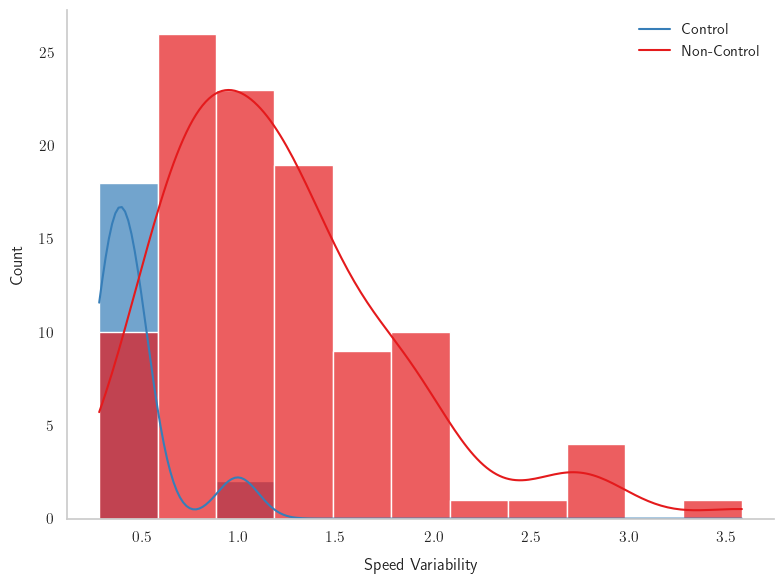

In [32]:
# Make the drawing speed variability plot
fig, ax = plt.subplots(figsize=(8, 6))
hue_order = [0, 1] 
legend_labels = {0: 'Control', 1: 'Non-Control'}
sns.histplot(df_metrics, x="speed_variability", hue="control_numeric", kde=True, palette="Set1", alpha=0.7,  hue_order=hue_order)
plt.xlabel("Speed Variability", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.legend(labels=[legend_labels[i] for i in hue_order], frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(root_dir,"graphs/speed_variation.pdf"), bbox_inches="tight")
plt.show()

In [33]:
print("Mean values for each metric:")
df_metrics.groupby("control")[numerical_features].mean()

Mean values for each metric:


,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,speed_variability
control,,,,,,,
N,688.58668,946.923795,1058.461317,1.032121,20.964926,5.409654,1.223911
Y,752.76349,1185.737313,1611.693997,0.828946,44.096586,9.949081,0.457247


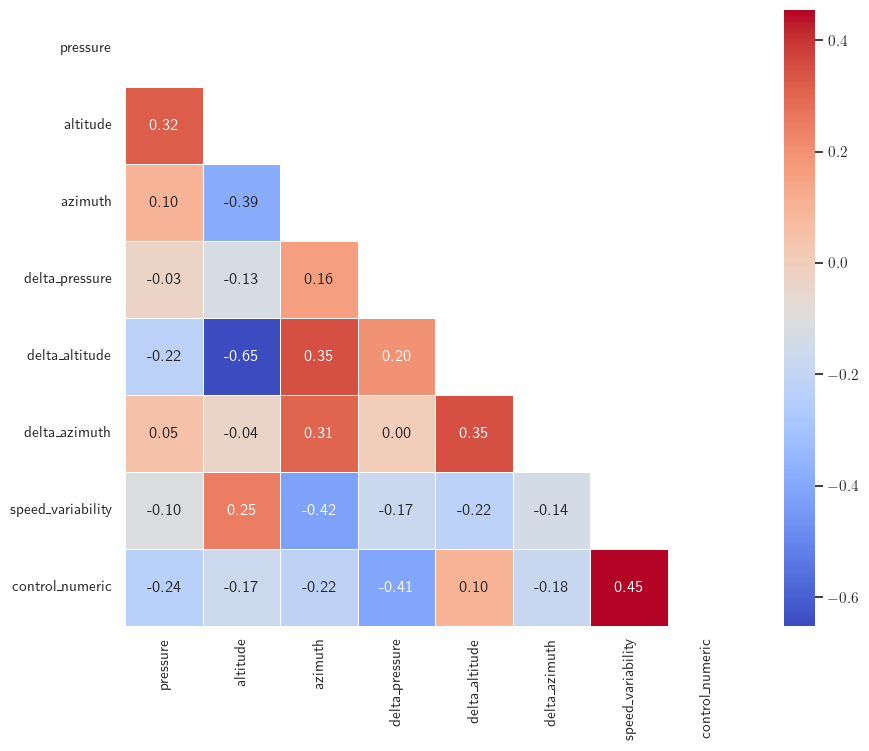

In [34]:
df_corr = df_metrics.copy()
df_corr["control_numeric"] = (df_corr["control"] == "N").astype(int)

correlation_matrix = df_corr[["pressure","altitude","azimuth", "delta_pressure", "delta_altitude", "delta_azimuth", "speed_variability","control_numeric"]].copy().corr("pearson")

mask = np.triu(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            cbar=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5, 
            mask=mask)
# plt.title("Correlation Heatmap");
plt.savefig(os.path.join(root_dir,"graphs/correlation_triangle.pdf"), bbox_inches="tight")

## Conducting the Kruskal Wallis tests

In [35]:
significance_level = 0.05
print("Kruskal-Wallis test results:")
for feature in numerical_features.tolist():
    stat, p_value = kruskal(control_group[feature],uncontrolled_group[feature])
    significant = False
    if p_value <= significance_level:
        significant = True
    print(f"Feature: {feature}, p-value: {p_value:.10f}, Significant: {significant}")

Kruskal-Wallis test results:
Feature: altitude, p-value: 0.0286185577, Significant: True
Feature: pressure, p-value: 0.0167796469, Significant: True
Feature: azimuth, p-value: 0.0306623116, Significant: True
Feature: delta_altitude, p-value: 0.5282356991, Significant: False
Feature: delta_pressure, p-value: 0.0000006584, Significant: True
Feature: delta_azimuth, p-value: 0.0005327229, Significant: True
Feature: speed_variability, p-value: 0.0000000003, Significant: True
